In [1]:
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt


#그래프에 한글 표현하기
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False


import  seaborn as sns
import  tensorflow as tf


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# 1_절도폭력

In [2]:
df = pd.read_csv("../완성본_안전도_회귀분석/1_절도폭력안전도.csv")
df = df[["crm_wthr_바람","crm_clue_피해자신고","crm_clue_고소","crm_clue_현행범","vic_sx_2","vic_age_60세초과","cctv_개수",
         "배치인원_수","비상벨_개수",
        "일인가구수","기초수급_19세이하","외국인수", "score_절폭"]]

#스케일링
scale = RobustScaler()
df_scale = scale.fit_transform(df.iloc[:,:-1])

#스케일링된 데이터 X_data에 담기
X_train = df_scale

#종속변수 2차원으로 만들고 y_data에 담기
y_train = np.reshape(np.array(df.iloc[:,-1]), (-1,1))

#테스트셋 불러오기 
df_test = pd.read_csv("../머신러닝_20년도예측데이터/v2_1_절도폭력_20년도test.csv")[["crm_wthr_바람","crm_clue_피해자신고","crm_clue_고소","crm_clue_현행범","vic_sx_2","vic_age_60세초과","cctv_개수",
         "배치인원_수","비상벨_개수",
        "일인가구수","기초수급_19세이하","외국인수", "score_절폭"]]

#스케일링한 X_train 데이터 담아주기
X_test = scale.transform(df_test.iloc[:,:-1])
X_test

array([[ 0.00000000e+00,  1.38733640e+00,  3.20312500e-01,
        -2.48175182e-01,  9.33149552e-01,  1.48471616e-01,
         1.53875721e+00,  4.12087912e-01, -2.28743416e-01,
         1.23592227e+00,  9.54906842e-01,  2.61546536e-02],
       [ 0.00000000e+00,  4.67633534e-01, -5.39062500e-01,
        -6.54848801e-01,  1.11647140e-01,  2.53275109e-01,
         3.85650224e-01, -3.40659341e-01, -2.57336343e-01,
        -2.47264045e-01,  9.54906842e-01,  4.76119664e-01],
       [ 0.00000000e+00,  5.13618677e-01, -1.48437500e-01,
        -4.19186653e-01,  4.25913163e-01,  8.64628821e-01,
         1.36450993e+00,  7.14285714e-02, -2.78404816e-01,
         3.59090005e-01,  9.54906842e-01,  2.36966410e-01],
       [ 0.00000000e+00, -3.72833392e-01, -4.68750000e-01,
        -9.28050052e-01, -5.33425224e-01, -6.55021834e-02,
        -7.04035874e-01, -7.41758242e-01, -3.40105342e-01,
        -7.00183502e-01,  2.23931898e+00, -6.04181246e-01],
       [ 0.00000000e+00, -6.77042802e-01, -6.2500000

In [3]:
#딥러닝
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,12]) 
y = tf.placeholder(tf.float32, shape = [None,1]) 

prob = tf.placeholder(tf.float32)

#--------------------------------------------------------------------------------------------------------------
# Layer1
# xavier 초기화
tf.set_random_seed(82)
W1 = tf.get_variable("W1", shape = [12,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512])) 
logit1 = tf.matmul(X,W1) +b1
layer1 = tf.nn.relu(logit1)
layer1 = tf.nn.dropout(layer1, keep_prob = prob)

# Layer2
W2 = tf.get_variable("W2", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512])) 
logit2 = tf.matmul(layer1,W2) +b2
layer2 = tf.nn.relu(logit2)
layer2 = tf.nn.dropout(layer2, keep_prob = prob)

# Layer3
W3 = tf.get_variable("W3", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512])) 
logit3 = tf.matmul(layer2,W3) +b2
layer3 = tf.nn.relu(logit3)
layer3 = tf.nn.dropout(layer3, keep_prob = prob)

# Layer4
W4 = tf.get_variable("W4", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512])) 
logit4 = tf.matmul(layer3,W4) +b4
layer4 = tf.nn.relu(logit4)
layer4 = tf.nn.dropout(layer4, keep_prob = prob)

# Layer5
W5 = tf.get_variable("W5", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512])) 
logit5 = tf.matmul(layer4,W5) +b5
layer5 = tf.nn.relu(logit1)
layer5 = tf.nn.dropout(layer5, keep_prob = prob)

# Layer6
W6 = tf.get_variable("W6", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512])) 
logit6 = tf.matmul(layer5,W6) +b6
layer6 = tf.nn.relu(logit6)
layer6 = tf.nn.dropout(layer6, keep_prob = prob)

# Layer7
W7 = tf.get_variable("W7", shape = [512,1], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1])) 
logit7 = tf.matmul(layer6,W7) +b7
layer7 = tf.nn.softmax(logit7)
layer7 = tf.nn.dropout(layer7, keep_prob = prob)


#--------------------------------------------------------------------------------------------------------------
# 비용
cost = tf.reduce_mean(tf.abs(logit7-y))

# 최소 비용
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

절폭_list = []
for step in range(100000):
    _, c, h = sess.run([train, cost, logit7], feed_dict={X:X_train, y:y_train, prob:1})
    절폭_list.append(c)
    
    if step % 10000 ==0:
        print(step ,":",c,"\n", h)
        
    


0 : 78.65397 
 [[-1.5054321 ]
 [-1.6580074 ]
 [-1.5203747 ]
 [-1.5926328 ]
 [-1.5948815 ]
 [-1.537442  ]
 [-1.6241695 ]
 [-1.5980873 ]
 [-1.6368234 ]
 [-1.6050894 ]
 [-1.5014744 ]
 [-1.5190645 ]
 [-1.4608165 ]
 [-1.3052378 ]
 [-1.4780899 ]
 [-1.6557745 ]
 [-1.59112   ]
 [-1.7389884 ]
 [-1.4314864 ]
 [-1.6439276 ]
 [-1.5320312 ]
 [-1.5178704 ]
 [-1.541766  ]
 [-1.6296984 ]
 [-1.5615027 ]
 [-1.6058533 ]
 [-1.6170557 ]
 [-1.5586375 ]
 [-1.6188563 ]
 [-1.4580396 ]
 [-1.607156  ]
 [-1.5709486 ]
 [-1.6222751 ]
 [-1.5903713 ]
 [-1.4575886 ]
 [-1.639226  ]
 [-1.6224846 ]
 [-1.4083842 ]
 [-1.6739552 ]
 [-1.6127152 ]
 [-1.6364204 ]
 [-1.485702  ]
 [-1.6199507 ]
 [-1.4768608 ]
 [-1.5367575 ]
 [-1.5072625 ]
 [-1.4764049 ]
 [-1.5921767 ]
 [-1.5720736 ]
 [-1.5766615 ]
 [-1.6127605 ]
 [-1.5264264 ]
 [-1.4726188 ]
 [-1.4183431 ]
 [-0.93914294]
 [-1.4948395 ]
 [-1.6401954 ]
 [-1.578502  ]
 [-1.7333195 ]
 [-1.46017   ]
 [-1.6225401 ]
 [-1.5243605 ]
 [-1.5702708 ]
 [-1.5423245 ]
 [-1.6296177 ]
 [-1.57849

In [5]:
#예측결과
np.ravel(sess.run(logit7, feed_dict = {X:X_test, prob:1}))

array([81.175354, 75.91763 , 81.82062 , 78.73227 , 81.622635, 78.640945,
       77.85742 , 80.64338 , 80.10419 , 84.266846, 78.383194, 78.07046 ,
       77.82925 , 76.82138 , 83.21832 , 82.10971 , 80.63455 , 81.92266 ,
       82.91266 , 79.44429 , 81.00123 , 80.770615, 85.473404, 85.42381 ,
       76.987885, 80.01682 , 87.00981 , 80.50123 , 82.70367 , 76.99566 ,
       85.73364 , 82.49606 , 78.288506, 83.73804 , 80.08082 , 86.24239 ,
       77.81448 , 75.277534, 80.69266 , 77.91395 , 81.126335],
      dtype=float32)

In [6]:
sess.close()

# 2_강도살인

In [7]:
df = pd.read_csv("../완성본_안전도_회귀분석/2_강도살인안전도.csv")
df = df[["crm_clue_변사체","crm_clue_자수","crm_clue_진정","crm_clue_현행범","crm_tm_저녁"
    ,"vic_sx_1","강도살인_검거수","화재_사망","화재_부상","공원_개수","자살_사망률_10만명당"
         ,"자살_연령표준화사망률_10만명당","기초수급_35_59세","기초수급_60세이상","외국인수", "score_강살"]]

#스케일링
scale = StandardScaler()
df_scale = scale.fit_transform(df.iloc[:,:-1])

#스케일링된 데이터 X_data에 담기
X_train = df_scale

#종속변수 2차원으로 만들고 y_data에 담기
y_train = np.reshape(np.array(df.iloc[:,-1]), (-1,1))

#테스트셋 불러오기 
df_test = pd.read_csv("../머신러닝_20년도예측데이터/v2_2_강도살인_20년도test.csv")[["crm_clue_변사체","crm_clue_자수","crm_clue_진정","crm_clue_현행범","crm_tm_저녁"
    ,"vic_sx_1","강도살인_검거수","화재_사망","화재_부상","공원_개수","자살_사망률_10만명당"
         ,"자살_연령표준화사망률_10만명당","기초수급_35_59세","기초수급_60세이상","외국인수", "score_강살"]]


#스케일링한 X_train 데이터 담아주기
X_test = scale.transform(df_test.iloc[:,:-1])

In [8]:
#딥러닝
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,15]) 
y = tf.placeholder(tf.float32, shape = [None,1]) 

prob = tf.placeholder(tf.float32)

#--------------------------------------------------------------------------------------------------------------
# Layer1
# xavier 초기화
#랜덤시드 고정
tf.set_random_seed(82)
W1 = tf.get_variable("W1", shape = [15,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512])) 
logit1 = tf.matmul(X,W1) +b1
layer1 = tf.nn.relu(logit1)
layer1 = tf.nn.dropout(layer1, keep_prob = prob)

# Layer2
W2 = tf.get_variable("W2", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512])) 
logit2 = tf.matmul(layer1,W2) +b2
layer2 = tf.nn.relu(logit2)
layer2 = tf.nn.dropout(layer2, keep_prob = prob)

# Layer3
W3 = tf.get_variable("W3", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512])) 
logit3 = tf.matmul(layer2,W3) +b2
layer3 = tf.nn.relu(logit3)
layer3 = tf.nn.dropout(layer3, keep_prob = prob)

# Layer4
W4 = tf.get_variable("W4", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512])) 
logit4 = tf.matmul(layer3,W4) +b4
layer4 = tf.nn.relu(logit4)
layer4 = tf.nn.dropout(layer4, keep_prob = prob)

# Layer5
W5 = tf.get_variable("W5", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512])) 
logit5 = tf.matmul(layer4,W5) +b5
layer5 = tf.nn.relu(logit1)
layer5 = tf.nn.dropout(layer5, keep_prob = prob)

# Layer6
W6 = tf.get_variable("W6", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512])) 
logit6 = tf.matmul(layer5,W6) +b6
layer6 = tf.nn.relu(logit6)
layer6 = tf.nn.dropout(layer6, keep_prob = prob)

# Layer7
W7 = tf.get_variable("W7", shape = [512,1], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1])) 
logit7 = tf.matmul(layer6,W7) +b7
layer7 = tf.nn.softmax(logit7)
layer7 = tf.nn.dropout(layer7, keep_prob = prob)


#--------------------------------------------------------------------------------------------------------------
# 비용
cost = tf.reduce_mean(tf.square(logit7-y))

# 최소 비용
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)



In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

강살_list = []
for step in range(100000):
    _, c, h = sess.run([train, cost, logit7], feed_dict={X:X_train, y:y_train, prob:1})
    강살_list.append(c)
    
    if step % 10000 ==0:
        print(step ,":",c,"\n", h)
        
    


0 : 6494.395 
 [[-1.4492072]
 [-1.4239407]
 [-1.3320445]
 [-1.5647296]
 [-1.6242964]
 [-1.3654568]
 [-1.5545495]
 [-1.3655413]
 [-1.59528  ]
 [-1.4341697]
 [-1.316539 ]
 [-1.5139874]
 [-1.332727 ]
 [-1.541273 ]
 [-1.5960215]
 [-1.612437 ]
 [-1.6474642]
 [-1.6462609]
 [-1.3276937]
 [-1.564203 ]
 [-1.6768901]
 [-1.6102633]
 [-1.510272 ]
 [-1.7538725]
 [-1.6254021]
 [-1.6074171]
 [-1.4814696]
 [-1.540663 ]
 [-1.6654873]
 [-1.5068915]
 [-1.5296917]
 [-1.5489546]
 [-1.4628742]
 [-1.6664197]
 [-1.5937481]
 [-1.6560873]
 [-1.6613312]
 [-1.6431276]
 [-1.7487769]
 [-1.6829877]
 [-1.4561174]
 [-1.2487403]
 [-1.4779546]
 [-1.3899659]
 [-1.6823072]
 [-1.4152257]
 [-1.2669672]
 [-1.5192428]
 [-1.4462888]
 [-1.3815281]
 [-1.5757148]
 [-1.734061 ]
 [-1.5889618]
 [-1.4155664]
 [-1.3643651]
 [-1.5582305]
 [-1.5463059]
 [-1.4656303]
 [-1.6537411]
 [-1.2752866]
 [-1.6141458]
 [-1.75774  ]
 [-1.6648864]
 [-1.5734885]
 [-1.6689296]
 [-1.6949596]
 [-1.7777307]
 [-1.4415361]
 [-1.6092916]
 [-1.7540618]
 [-1.

In [10]:
#예측결과
np.ravel(sess.run(logit7, feed_dict = {X:X_test, prob:1}))

array([83.22818 , 78.319405, 80.05012 , 79.83779 , 82.24515 , 80.54429 ,
       82.55447 , 82.48198 , 83.77015 , 84.73997 , 78.28315 , 78.97464 ,
       79.08591 , 77.8563  , 75.95926 , 67.72306 , 81.53426 , 83.50287 ,
       84.87488 , 79.79777 , 80.882614, 80.522026, 83.955284, 83.61972 ,
       77.51363 , 78.48546 , 85.11364 , 85.53954 , 82.91134 , 84.98015 ,
       82.99662 , 82.22747 , 78.9039  , 83.66268 , 79.67005 , 83.37171 ,
       79.64716 , 74.51676 , 83.43479 , 77.996056, 82.58731 ],
      dtype=float32)

# 3_교통사고

In [11]:
df = pd.read_csv("../완성본_안전도_회귀분석/3_교통사고안전도.csv")
df = df[["crm_wthr_눈","crm_clue_피해자신고","vic_age_2_30대","일인가구수"
    ,"총_인구수","기초수급_19세이하","기초수급_60세이상"
         ,"외국인수", "score_교통"]]

#스케일링
scale = RobustScaler()
df_scale = scale.fit_transform(df.iloc[:,:-1])

#스케일링된 데이터 X_data에 담기
X_train = df_scale

#종속변수 2차원으로 만들고 y_data에 담기
y_train = np.reshape(np.array(df.iloc[:,-1]), (-1,1))

#테스트셋 불러오기 
df_test = pd.read_csv("../머신러닝_20년도예측데이터/v2_3_교통사고_20년도test.csv")[["crm_wthr_눈","crm_clue_피해자신고","vic_age_2_30대","일인가구수"
    ,"총_인구수","기초수급_19세이하","기초수급_60세이상"
         ,"외국인수", "score_교통"]]

#스케일링한 X_test 데이터 담아주기
X_test = scale.transform(df_test.iloc[:,:-1])


In [12]:
#딥러닝
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,8]) 
y = tf.placeholder(tf.float32, shape = [None,1]) 

prob = tf.placeholder(tf.float32)

#--------------------------------------------------------------------------------------------------------------
# Layer1
# xavier 초기화
#랜덤시드 고정
tf.set_random_seed(82)
W1 = tf.get_variable("W1", shape = [8,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512])) 
logit1 = tf.matmul(X,W1) +b1
layer1 = tf.nn.relu(logit1)
layer1 = tf.nn.dropout(layer1, keep_prob = prob)

# Layer2
W2 = tf.get_variable("W2", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512])) 
logit2 = tf.matmul(layer1,W2) +b2
layer2 = tf.nn.relu(logit2)
layer2 = tf.nn.dropout(layer2, keep_prob = prob)

# Layer3
W3 = tf.get_variable("W3", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512])) 
logit3 = tf.matmul(layer2,W3) +b2
layer3 = tf.nn.relu(logit3)
layer3 = tf.nn.dropout(layer3, keep_prob = prob)

# Layer4
W4 = tf.get_variable("W4", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512])) 
logit4 = tf.matmul(layer3,W4) +b4
layer4 = tf.nn.relu(logit4)
layer4 = tf.nn.dropout(layer4, keep_prob = prob)

# Layer5
W5 = tf.get_variable("W5", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512])) 
logit5 = tf.matmul(layer4,W5) +b5
layer5 = tf.nn.relu(logit1)
layer5 = tf.nn.dropout(layer5, keep_prob = prob)

# Layer6
W6 = tf.get_variable("W6", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512])) 
logit6 = tf.matmul(layer5,W6) +b6
layer6 = tf.nn.relu(logit6)
layer6 = tf.nn.dropout(layer6, keep_prob = prob)

# Layer7
W7 = tf.get_variable("W7", shape = [512,1], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1])) 
logit7 = tf.matmul(layer6,W7) +b7
layer7 = tf.nn.softmax(logit7)
layer7 = tf.nn.dropout(layer7, keep_prob = prob)


#--------------------------------------------------------------------------------------------------------------
# 비용
cost = tf.reduce_mean(tf.square(logit7-y))

# 최소 비용
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)



In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

교통_list = []
for step in range(100000):
    _, c, h = sess.run([train, cost, logit7], feed_dict={X:X_train, y:y_train, prob:1})
    교통_list.append(c)
    
    if step % 10000 ==0:
        print(step ,":",c,"\n", h)
        
    


0 : 4981.3604 
 [[-1.5121784]
 [-1.5805229]
 [-1.598713 ]
 [-1.482463 ]
 [-1.4786899]
 [-1.6015203]
 [-1.4915403]
 [-1.4946911]
 [-1.5051097]
 [-1.5991638]
 [-1.6276555]
 [-1.5472538]
 [-1.5253772]
 [-1.5599525]
 [-1.6710217]
 [-1.7751242]
 [-1.7455777]
 [-1.6606816]
 [-1.4836693]
 [-1.599961 ]
 [-1.6401758]
 [-1.6383126]
 [-1.6470803]
 [-1.6693151]
 [-1.6565359]
 [-1.5365055]
 [-1.6487601]
 [-1.663396 ]
 [-1.61095  ]
 [-1.5908829]
 [-1.618979 ]
 [-1.6015385]
 [-1.7626177]
 [-1.6973574]
 [-1.5581502]
 [-1.6238127]
 [-1.5835662]
 [-1.5409702]
 [-1.6892711]
 [-1.6648214]
 [-1.6493875]
 [-1.3802189]
 [-1.4365757]
 [-1.5056016]
 [-1.3959868]
 [-1.4039438]
 [-1.5727556]
 [-1.4171938]
 [-1.4221843]
 [-1.4289086]
 [-1.5933449]
 [-1.5840224]
 [-1.5297126]
 [-1.4243389]
 [-1.5002058]
 [-1.6500043]
 [-1.7427238]
 [-1.7169479]
 [-1.671958 ]
 [-1.4186764]
 [-1.5619862]
 [-1.6258434]
 [-1.6197903]
 [-1.6150665]
 [-1.6526401]
 [-1.6523871]
 [-1.4963877]
 [-1.6556165]
 [-1.6406772]
 [-1.565782 ]
 [-1

In [14]:
#예측결과
np.ravel(sess.run(logit7, feed_dict = {X:X_test, prob:1}))

array([68.37581 , 70.16102 , 70.03307 , 70.22796 , 75.063545, 74.86209 ,
       70.50589 , 72.936966, 71.3807  , 69.091866, 71.69133 , 73.58657 ,
       71.20319 , 65.49154 , 71.43142 , 71.113914, 78.58094 , 76.662544,
       70.967   , 73.06726 , 72.947105, 70.5384  , 70.481865, 79.243675,
       71.18359 , 70.29176 , 71.631386, 74.08965 , 72.90627 , 76.37736 ,
       71.92219 , 71.87342 , 69.07641 , 73.32627 , 77.30283 , 75.04306 ,
       71.88557 , 68.05862 , 70.220894, 70.64573 , 69.953064],
      dtype=float32)

In [15]:
sess.close()

# 4_법질서

In [16]:
df = pd.read_csv("../완성본_안전도_회귀분석/4_법질서안전도.csv")
df = df[["crm_clue_자수","crm_clue_타인신고","crm_clue_현행범","crm_clue_탐문정보","vic_sx_2","기초수급_19세이하","기초수급_20_34세",
         "crm_tm_새벽","화재_사망","cctv_개수","배치인원_수","비상벨_개수","일인가구수", "score_법질서"]]

#스케일링
scale = RobustScaler()
df_scale = scale.fit_transform(df.iloc[:,:-1])

#스케일링된 데이터 X_data에 담기
X_train = df_scale

#종속변수 2차원으로 만들고 y_data에 담기
y_train = np.reshape(np.array(df.iloc[:,-1]), (-1,1))

#테스트셋 불러오기 
df_test = pd.read_csv("../머신러닝_20년도예측데이터/v2_4_법질서_20년도test.csv")[["crm_clue_자수","crm_clue_타인신고","crm_clue_현행범","crm_clue_탐문정보","vic_sx_2","기초수급_19세이하","기초수급_20_34세",
         "crm_tm_새벽","화재_사망","cctv_개수","배치인원_수","비상벨_개수","일인가구수", "score_법질서"]]

#스케일링한 X_test 데이터 담아주기
X_test = scale.transform(df_test.iloc[:,:-1])

In [17]:
#딥러닝
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,13]) 
y = tf.placeholder(tf.float32, shape = [None,1]) 

prob = tf.placeholder(tf.float32)

#--------------------------------------------------------------------------------------------------------------
# Layer1
# xavier 초기화
#랜덤시드 고정
tf.set_random_seed(82)
W1 = tf.get_variable("W1", shape = [13,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512])) 
logit1 = tf.matmul(X,W1) +b1
layer1 = tf.nn.relu(logit1)
layer1 = tf.nn.dropout(layer1, keep_prob = prob)

# Layer2
W2 = tf.get_variable("W2", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512])) 
logit2 = tf.matmul(layer1,W2) +b2
layer2 = tf.nn.relu(logit2)
layer2 = tf.nn.dropout(layer2, keep_prob = prob)

# Layer3
W3 = tf.get_variable("W3", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512])) 
logit3 = tf.matmul(layer2,W3) +b2
layer3 = tf.nn.relu(logit3)
layer3 = tf.nn.dropout(layer3, keep_prob = prob)

# Layer4
W4 = tf.get_variable("W4", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512])) 
logit4 = tf.matmul(layer3,W4) +b4
layer4 = tf.nn.relu(logit4)
layer4 = tf.nn.dropout(layer4, keep_prob = prob)

# Layer5
W5 = tf.get_variable("W5", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512])) 
logit5 = tf.matmul(layer4,W5) +b5
layer5 = tf.nn.relu(logit1)
layer5 = tf.nn.dropout(layer5, keep_prob = prob)

# Layer6
W6 = tf.get_variable("W6", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512])) 
logit6 = tf.matmul(layer5,W6) +b6
layer6 = tf.nn.relu(logit6)
layer6 = tf.nn.dropout(layer6, keep_prob = prob)

# Layer7
W7 = tf.get_variable("W7", shape = [512,1], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1])) 
logit7 = tf.matmul(layer6,W7) +b7
layer7 = tf.nn.softmax(logit7)
layer7 = tf.nn.dropout(layer7, keep_prob = prob)


#--------------------------------------------------------------------------------------------------------------
# 비용
cost = tf.reduce_mean(tf.square(logit7-y))

# 최소 비용
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)



In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

법질서_list = []
for step in range(100000):
    _, c, h = sess.run([train, cost, logit7], feed_dict={X:X_train, y:y_train, prob:1})
    법질서_list.append(c)
    
    if step % 10000 ==0:
        print(step ,":",c,"\n", h)
        
    


0 : 4969.079 
 [[-1.3606815]
 [-1.5401826]
 [-1.3764164]
 [-1.5152963]
 [-1.537669 ]
 [-1.5367956]
 [-1.5683427]
 [-1.5743003]
 [-1.5285925]
 [-1.4867431]
 [-1.5702162]
 [-1.4518385]
 [-1.5188113]
 [-1.4124744]
 [-1.442981 ]
 [-1.5096769]
 [-1.5455357]
 [-1.5797324]
 [-1.3693008]
 [-1.6172829]
 [-1.643883 ]
 [-1.6193087]
 [-1.6016915]
 [-1.5894854]
 [-1.5540075]
 [-1.5301709]
 [-1.4409554]
 [-1.5857768]
 [-1.5313046]
 [-1.5220358]
 [-1.5904478]
 [-1.5878785]
 [-1.464257 ]
 [-1.716299 ]
 [-1.5453867]
 [-1.7154979]
 [-1.5541766]
 [-1.5458684]
 [-1.6438708]
 [-1.6602054]
 [-1.6206937]
 [-1.3488774]
 [-1.474846 ]
 [-1.334166 ]
 [-1.435595 ]
 [-1.4766712]
 [-1.5285839]
 [-1.4776999]
 [-1.4759704]
 [-1.4665849]
 [-1.4884107]
 [-1.5256329]
 [-1.5224864]
 [-1.5204289]
 [-1.4175594]
 [-1.4347391]
 [-1.5421319]
 [-1.5166862]
 [-1.7019868]
 [-1.3707085]
 [-1.6909616]
 [-1.5846734]
 [-1.614522 ]
 [-1.6630917]
 [-1.5959399]
 [-1.5747571]
 [-1.4519793]
 [-1.5165501]
 [-1.5717272]
 [-1.588845 ]
 [-1.

In [19]:
#예측결과
np.ravel(sess.run(logit7, feed_dict = {X:X_test, prob:1}))

array([76.51894 , 74.272766, 75.18193 , 71.648865, 73.04295 , 71.44496 ,
       71.42111 , 73.553085, 74.224205, 75.37507 , 75.18876 , 72.93768 ,
       72.0446  , 70.13729 , 70.75099 , 70.16817 , 69.1089  , 72.60047 ,
       76.510864, 72.69046 , 73.35957 , 72.12253 , 74.46579 , 77.39697 ,
       72.23694 , 71.51555 , 79.190704, 72.859215, 73.28147 , 74.1476  ,
       76.70441 , 72.94361 , 70.79892 , 76.97823 , 71.81941 , 77.44821 ,
       70.42641 , 68.36243 , 69.01834 , 69.2967  , 72.50711 ],
      dtype=float32)

In [20]:
sess.close()

# 5_전반적

In [21]:
df = pd.read_csv("../완성본_안전도_회귀분석/5_전반적안전도.csv")
df = df[["crm_wthr_흐림","crm_clue_타인신고","crm_clue_피해자신고","crm_clue_현행범","crm_tm_저녁","화재_사망","배치인원_수",
        "비상벨_개수","기초수급_19세이하","외국인수", "score_전반"]]

#스케일링
scale = RobustScaler()
df_scale = scale.fit_transform(df.iloc[:,:-1])

#스케일링된 데이터 X_data에 담기
X_train = df_scale

#종속변수 2차원으로 만들고 y_data에 담기
y_train = np.reshape(np.array(df.iloc[:,-1]), (-1,1))

#테스트셋 불러오기 
df_test = pd.read_csv("../머신러닝_20년도예측데이터/v2_5_전반_20년도test.csv")[["crm_wthr_흐림","crm_clue_타인신고","crm_clue_피해자신고","crm_clue_현행범","crm_tm_저녁","화재_사망","배치인원_수",
        "비상벨_개수","기초수급_19세이하","외국인수", "score_전반"]]

#스케일링한 X_test 데이터 담아주기
X_test = scale.transform(df_test.iloc[:,:-1])
X_test

array([[ 2.29166667e-01,  2.56842105e+00,  1.33132417e+00,
        -1.00390407e-02,  1.30951563e+00, -5.00000000e-01,
         4.12087912e-01, -2.28743416e-01,  9.54906842e-01,
         2.61546536e-02],
       [ 6.66666667e-01,  9.20300752e-01,  3.60896591e-01,
        -3.93753486e-01,  3.01614565e-01,  5.00000000e-01,
        -3.40659341e-01, -2.57336343e-01,  9.54906842e-01,
         4.76119664e-01],
       [-3.43750000e-01,  1.05263158e+00,  4.01205500e-01,
        -1.34969325e-01,  6.05977327e-01,  0.00000000e+00,
         7.14285714e-02, -2.78404816e-01,  9.54906842e-01,
         2.36966410e-01],
       [-5.41666667e-01, -4.15037594e-01, -6.01243172e-01,
        -7.68544339e-01, -6.60254208e-01,  0.00000000e+00,
        -7.41758242e-01, -3.40105342e-01,  2.23931898e+00,
        -6.04181246e-01],
       [-7.08333333e-01, -8.99248120e-01, -7.46656621e-01,
        -9.29168991e-01, -8.77361731e-01,  0.00000000e+00,
        -9.78021978e-01, -3.35590670e-01,  2.23931898e+00,
        -6.

In [22]:
#딥러닝
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,10]) 
y = tf.placeholder(tf.float32, shape = [None,1]) 

prob = tf.placeholder(tf.float32)

#--------------------------------------------------------------------------------------------------------------
# Layer1
# xavier 초기화
#랜덤시드 고정
tf.set_random_seed(82)
W1 = tf.get_variable("W1", shape = [10,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512])) 
logit1 = tf.matmul(X,W1) +b1
layer1 = tf.nn.relu(logit1)
layer1 = tf.nn.dropout(layer1, keep_prob = prob)

# Layer2
W2 = tf.get_variable("W2", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512])) 
logit2 = tf.matmul(layer1,W2) +b2
layer2 = tf.nn.relu(logit2)
layer2 = tf.nn.dropout(layer2, keep_prob = prob)

# Layer3
W3 = tf.get_variable("W3", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512])) 
logit3 = tf.matmul(layer2,W3) +b2
layer3 = tf.nn.relu(logit3)
layer3 = tf.nn.dropout(layer3, keep_prob = prob)

# Layer4
W4 = tf.get_variable("W4", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512])) 
logit4 = tf.matmul(layer3,W4) +b4
layer4 = tf.nn.relu(logit4)
layer4 = tf.nn.dropout(layer4, keep_prob = prob)

# Layer5
W5 = tf.get_variable("W5", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512])) 
logit5 = tf.matmul(layer4,W5) +b5
layer5 = tf.nn.relu(logit1)
layer5 = tf.nn.dropout(layer5, keep_prob = prob)

# Layer6
W6 = tf.get_variable("W6", shape = [512,512], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([512])) 
logit6 = tf.matmul(layer5,W6) +b6
layer6 = tf.nn.relu(logit6)
layer6 = tf.nn.dropout(layer6, keep_prob = prob)

# Layer7
W7 = tf.get_variable("W7", shape = [512,1], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1])) 
logit7 = tf.matmul(layer6,W7) +b7
layer7 = tf.nn.softmax(logit7)
layer7 = tf.nn.dropout(layer7, keep_prob = prob)


#--------------------------------------------------------------------------------------------------------------
# 비용
cost = tf.reduce_mean(tf.square(logit7-y))

# 최소 비용
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)



In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

전반적_list = []
for step in range(100000):
    _, c, h = sess.run([train, cost, logit7], feed_dict={X:X_train, y:y_train, prob:1})
    전반적_list.append(c)
    
    if step % 10000 ==0:
        print(step ,":",c,"\n", h)
        
    


0 : 5630.5474 
 [[-1.4667392]
 [-1.4812443]
 [-1.5137174]
 [-1.5792065]
 [-1.6690626]
 [-1.6715373]
 [-1.669577 ]
 [-1.6341921]
 [-1.5326757]
 [-1.5431033]
 [-1.5512989]
 [-1.5694114]
 [-1.4775558]
 [-1.3243568]
 [-1.5546999]
 [-1.2752622]
 [-1.418189 ]
 [-1.5217501]
 [-1.510945 ]
 [-1.6016806]
 [-1.4339797]
 [-1.4687688]
 [-1.5302186]
 [-1.6365448]
 [-1.5294349]
 [-1.6550444]
 [-1.5614165]
 [-1.5607121]
 [-1.6271201]
 [-1.435175 ]
 [-1.709081 ]
 [-1.6550672]
 [-1.1831928]
 [-1.5667729]
 [-1.657376 ]
 [-1.6046922]
 [-1.6527221]
 [-1.5821652]
 [-1.4867201]
 [-1.6019092]
 [-1.6462381]
 [-1.5303345]
 [-1.4892745]
 [-1.5120611]
 [-1.5527778]
 [-1.6320751]
 [-1.6482859]
 [-1.6337764]
 [-1.6529233]
 [-1.6221588]
 [-1.6112775]
 [-1.4450302]
 [-1.427523 ]
 [-1.5267967]
 [-1.42518  ]
 [-1.6039883]
 [-1.2426972]
 [-1.4616746]
 [-1.692107 ]
 [-1.5108995]
 [-1.6827364]
 [-1.4434985]
 [-1.4603742]
 [-1.5172329]
 [-1.7002505]
 [-1.4534043]
 [-1.4885007]
 [-1.6315296]
 [-1.6041995]
 [-1.6566434]
 [-1

In [24]:
#예측결과
np.ravel(sess.run(logit7, feed_dict = {X:X_test, prob:1}))

array([72.53762 , 73.662865, 74.91579 , 72.41907 , 74.54145 , 73.43984 ,
       75.72648 , 74.96502 , 73.43642 , 75.95537 , 76.750534, 74.730415,
       74.41992 , 72.62395 , 73.27912 , 76.3033  , 74.84589 , 77.59372 ,
       77.08199 , 75.283325, 80.40796 , 76.47955 , 76.20189 , 81.02275 ,
       72.84221 , 74.951385, 81.00514 , 76.944305, 77.14484 , 76.08032 ,
       78.77134 , 75.728714, 75.6772  , 79.692726, 73.62885 , 79.6198  ,
       75.41438 , 71.166756, 73.77246 , 76.52545 , 75.93056 ],
      dtype=float32)

In [25]:
sess.close()

# 학습횟수에 따른 mae변화 그래프

(0.0, 30.0)

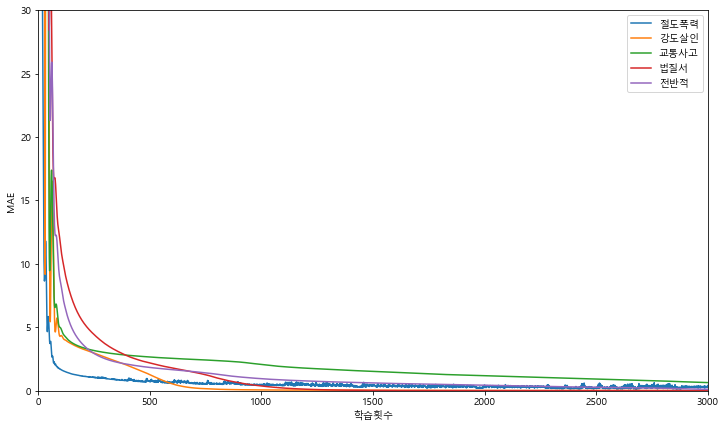

In [26]:
plt.figure(figsize = (12,7))
plt.plot(절폭_list)
plt.plot( 강살_list)
plt.plot( 교통_list)
plt.plot( 법질서_list)
plt.plot(전반적_list)
plt.xlabel("학습횟수")
plt.ylabel("MAE")
plt.legend(["절도폭력","강도살인","교통사고","법질서","전반적"])
plt.xlim(0,3000)
plt.ylim(0,30)
